# Projet Premier Modèle IA (Régression linéaire simple, multiple et polynomiale)

## 1. Regression linéraire

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

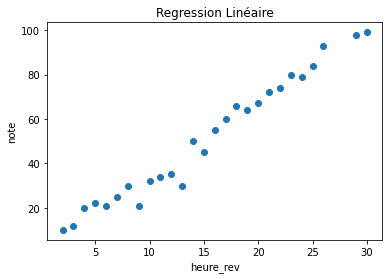

In [17]:
data = pd.read_csv("reg_simple.csv ")

#Features : "heure_rev", Target : "note"
x = data["heure_rev"]
y = data["note"]

#Création d'un graphique
plt.title('Regression Linéaire')
plt.xlabel('heure_rev')
plt.ylabel('note')
plt.scatter(x,y)

### Sans SKLEARN

#### Vérification des dimensions

In [18]:
x = data["heure_rev"]
y = data["note"]

#Redimensionnement des matrices
x = x.values.reshape((x.shape[0],1))
y = y.values.reshape((y.shape[0],1))

print(x.shape)
print(y.shape)

#Ajout de la colonne de biais à x
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

#Création d'un vecteur parametre theta
theta = np.random.randn(2, 1)
print(theta)

(27, 1)
(27, 1)
(27, 2)
[[-1.84394458]
 [ 2.54897977]]


#### Fonctions

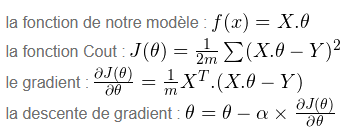

In [19]:
#Fonction Modèle
def model(X, theta):
    return X.dot(theta)

#Fonction Cout 
def cout_fonction(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

#Fonction Gradient
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

#Création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele 
def gradient_descente(X, y, theta, alpha, n_iterations):
    cout_historique = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        #Mise a jour du parametre theta
        theta = theta - alpha * gradient(X, y, theta)
        #Enregistrement de la valeur du Cout au tour i dans cost_history[i]
        cout_historique[i] = cout_fonction(X, y, theta) 
         
    return theta, cout_historique

#### Entrainement

[[3.22207901]
 [2.73293052]]


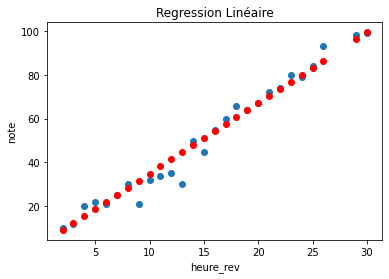

In [20]:
n_iterations = 30
alpha = 0.005
 
theta_final, cout_historique = gradient_descente(X, y, theta, alpha, n_iterations)

#Paramètres du modèle
print(theta_final) 
 
#Création d'un vecteur prédictions notre modèle final
predictions = model(X, theta_final)
 
#Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.title('Regression Linéaire')
plt.xlabel('heure_rev')
plt.ylabel('note')
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')
plt.show()

#### Evaluation

In [21]:
def coefficient_determination(y, pred):
    #Formule de la somme des carrées résiduels
    u = ((y - pred)**2).sum()
         
    #Formule de la somme des carrées
    v = ((y - y.mean())**2).sum()
    return 1-u/v

print(coefficient_determination(y, predictions).round(3))
print(mean_squared_error(y, predictions))

0.972
20.9392913490539


Nous obtenons un coefficient de détermination de 0.97, proche de 1. Notre modèle satisfait nos attentes.

#### Historique

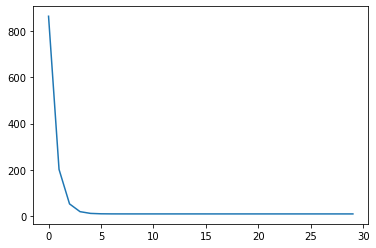

In [22]:
plt.plot(range(n_iterations), cout_historique)
plt.show()

L'historique de notre fonction cout présente un palier vers l'abscisse 4 et n'évolue plus. Un nombre d'itération de 10 aurait été suffisant pour obtenir notre modèle optimal. 

### Avec SKLEARN

[[3.35199279]]
[0.81801188]


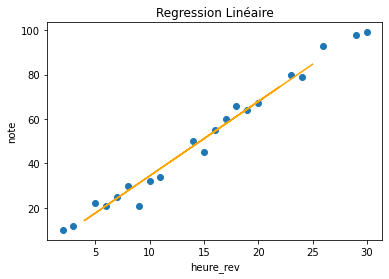

In [23]:
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

data = pd.read_csv("reg_simple.csv ")
x = data["heure_rev"]
y = data["note"]

#Redimensionnement des matrices
x = x.values.reshape((x.shape[0],1))
y = y.values.reshape((y.shape[0],1))

from sklearn.preprocessing import StandardScaler

#Apprentissage
x_app, x_test, y_app, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

#Modèle
model = linear_model.LinearRegression()
model.fit(x_app, y_app)
print(model.coef_)
print(model.intercept_)

#Prédiction
y_pred = model.predict(x_test)
pred = model.predict(x)

plt.title('Regression Linéaire')
plt.xlabel('heure_rev')
plt.ylabel('note')
plt.scatter(x_app, y_app)
plt.plot(x_test, y_pred, c='orange')
plt.show()

In [24]:
#Mesure du "taux d'erreur" de notre modèle. 
mean_squared_error(y, pred)

20.094534996033637

Une MSE proche de 0 indique des erreurs minimes entre notre Target et ses valeurs prédictives. Notre modèle est donc satisfaisant.

In [25]:
#Renvoie le R² de notre modèle
print(model.score(x_test, y_test))
print(model.score(x, y))

0.9248411693917794
0.9728899490846515


## Régression Multiple

### Sans SKLEARN

In [26]:
data2 = pd.read_csv("boston_house_prices.csv")
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


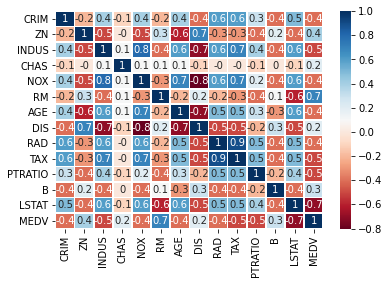

In [27]:
import seaborn as sb

corr = data2.corr().round(1)

sb.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu',
            annot=True,
            linewidth=0.7)

Exemple sur la Feature INDUS et la Target *y* MEDV.

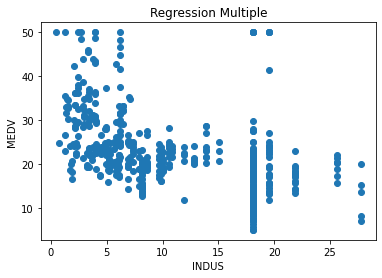

In [28]:
y = data2["MEDV"]
x = data2[['CRIM','ZN','INDUS','CHAS','NOX' ,'RM' ,'AGE' ,'DIS','RAD' ,'TAX','PTRATIO','B','LSTAT']]
plt.title('Regression Multiple')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.scatter(x['INDUS'],y)

#### Vérification des dimensions

In [29]:
print(x.shape)
print(y.shape)

#Redimensionnement de la matrice y pour lui définir un colonne.
y = y.values.reshape((y.shape[0],1))
print(y.shape)

(506, 13)
(506,)
(506, 1)


In [30]:
#Ajout de la colonne de biais a X
X = np.hstack((x, np.ones((x.shape[0],1))))
print(X.shape)

#Création d'un vecteur paramètre theta (7 colonnes de Features + 1 biais)
theta = np.random.randn(14, 1)
print(theta)

(506, 14)
[[-0.91586105]
 [ 0.19805497]
 [ 0.66914767]
 [ 0.83937969]
 [ 0.64889841]
 [ 0.02162784]
 [ 0.4454972 ]
 [-1.24888755]
 [ 0.20009756]
 [-0.65388462]
 [ 0.76511052]
 [-0.20764515]
 [ 1.03191348]
 [ 1.63275891]]


#### Fonctions

Nos formules restent les mêmes que pour la régression linéaire simple.

In [31]:
def model(X, theta):
    return X.dot(theta)
 
def cout_fonction(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
 
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
 
def gradient_descente(X, y, theta, alpha, n_iterations):
    #Création d'un tableau de stockage afin d'enregistrer l'évolution du Cout du modele
    cout_historique = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        #Mise a jour du parametre theta
        theta = theta - alpha * gradient(X, y, theta)
        cout_historique[i] = cout_fonction(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
         
    return theta, cout_historique

#### Entrainement

Après plusieurs essais, le nombre d'itérations et le pas (*learning rate alpha*) ont été fixés comme tels ci-dessous (chargement de 30s environ) :

[[-9.37952276e-02]
 [ 5.90957726e-02]
 [-2.02765997e-02]
 [ 1.32956817e+00]
 [ 8.08729921e-01]
 [ 4.95676816e+00]
 [ 4.06091331e-03]
 [-8.92968832e-01]
 [ 1.80280301e-01]
 [-1.04715357e-02]
 [-2.79823924e-01]
 [ 1.58472351e-02]
 [-5.00440645e-01]
 [ 2.15811163e+00]]


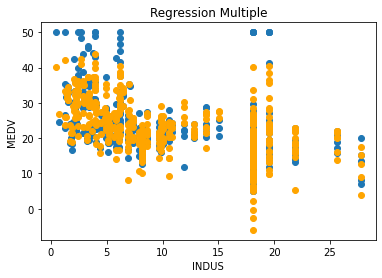

In [32]:
n_iterations = 500000
alpha = 0.0000063
 
theta_final, cout_historique = gradient_descente(X, y, theta, alpha, n_iterations)

#Parametres du modèle 
print(theta_final) 
 
#Création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
 
# Affiche les résultats de prédictions (en rouge) par rapport au Dataset (en bleu)
plt.title('Regression Multiple')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.scatter(x['INDUS'], y)
plt.scatter(x['INDUS'], predictions, c='orange')
plt.show()

#### Evaluation

In [33]:
def coefficient_determination(y, pred):
    #Formule de la somme des carrées résiduels
    u = ((y - pred)**2).sum()
         
    #Formule de la somme des carrées
    v = ((y - y.mean())**2).sum()
    return 1-u/v

coefficient_determination(y, predictions).round(3)

0.71

In [34]:
mean_squared_error(y, predictions)

24.44867018576944

#### Historique

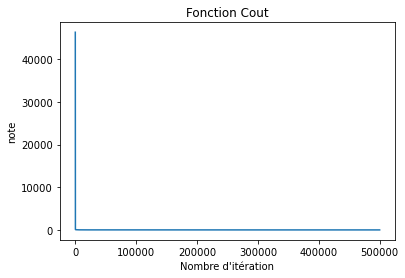

In [35]:
plt.title('Fonction Cout')
plt.xlabel('Nombre d\'itération')
plt.ylabel('note')
plt.plot(range(n_iterations), cout_historique)
plt.show()

Nous avons choisis un nombre d'itération considérablement plus grand que celui nécessaire pour atteindre le palier. De 100000 à 500000 itérations, nous obtenons un R² passant de 0.5 à 0.7.

### Avec SKLEARN

In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

data2 = pd.read_csv("boston_house_prices.csv")
data2.head()

y = data2["MEDV"]
x = data2[['CRIM','ZN','INDUS','CHAS','NOX' ,'RM' ,'AGE' ,'DIS','RAD' ,'TAX','PTRATIO','B' ,'LSTAT']]

print(x.shape)

y = y.values.reshape((y.shape[0],1))
print(y.shape)

(506, 13)
(506, 1)


In [37]:
#Apprentissage
x_app, x_test, y_app, y_test = train_test_split(x,y,test_size=0.2,random_state=3)

#Construction du modèle sur l’échantillon d’apprentissage
model = linear_model.LinearRegression()
model.fit(x_app, y_app)
print(model.coef_)
print(model.intercept_)

[[-1.23897571e-01  4.81822924e-02 -4.74497796e-02  3.36938950e+00
  -1.56635488e+01  3.59419367e+00 -9.33206067e-03 -1.47089101e+00
   3.05053544e-01 -1.08397039e-02 -9.08791339e-01  1.00352939e-02
  -4.77714677e-01]]
[35.86168335]


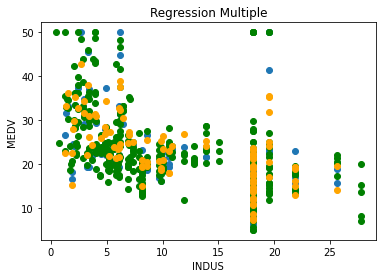

In [38]:
#Prédiction sur l’échantillon test
y_pred = model.predict(x_test)
y_pred

plt.title('Regression Multiple')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.scatter(x_test['INDUS'], y_test)
plt.scatter(x_app['INDUS'],y_app, c='green')
plt.scatter(x_test['INDUS'], y_pred, c='orange')
plt.show()

In [39]:
#Evaluation
mean_squared_error(y_test, y_pred)

16.943073013833747

In [40]:
success = cross_val_score(model, x_app, y_app, cv=10)
success

array([0.52404019, 0.74685054, 0.68148351, 0.71139214, 0.78596279,
       0.50663494, 0.84805953, 0.58777922, 0.54304865, 0.8550718 ])

Cv = Détermine la stratégie de fractionnement de validation croisée. Array de Scores pour chaque run de cross validation.

In [41]:
model.score(x, y)

0.7381259083032992

## Régression Polynomiale

### Sans SKLEARN

### Position_salaries

In [42]:
data3 = pd.read_csv("position_salaries.csv")
data3.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


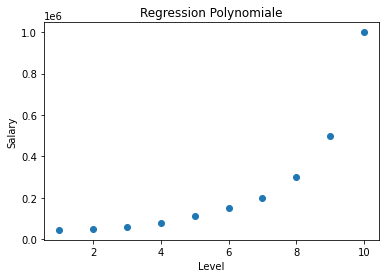

In [43]:
x = data3["Level"]
y = data3["Salary"]

plt.title('Regression Polynomiale')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(x,y)

In [44]:
#Redimensionnement des matrices
x = x.values.reshape((x.shape[0],1))
y = y.values.reshape((y.shape[0],1))

print(x.shape)
print(y.shape)

#Ajout de la colonne de biais a X
X = np.hstack((x, np.ones(x.shape)))

#Ajout d'une colonne supplémentaire comportant les valeurs x pour chaque puissance de 2 à 5.
X = np.hstack((x**2,X))
X = np.hstack((x**3,X))
X = np.hstack((x**4,X))
X = np.hstack((x**5,X))
print(X.shape)

#Création d'un vecteur parametre theta
theta = np.random.randn(6, 1)
print(theta)

(10, 1)
(10, 1)
(10, 6)
[[ 0.18519184]
 [-0.06358449]
 [-1.18616019]
 [ 0.55626928]
 [-0.07322902]
 [-0.0503154 ]]


#### Fonctions

In [45]:
def model(X, theta):
    return X.dot(theta)
 
def cout_fonction(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
 
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
 
def gradient_descente(X, y, theta, alpha, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cout_historique = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        theta = theta - alpha * gradient(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cout_historique[i] = cout_fonction(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
         
    return theta, cout_historique

#### Entrainements

[[ 9.32116191e+00]
 [ 3.37537961e+00]
 [-1.14837060e-01]
 [ 8.43867453e-01]
 [ 1.51409974e-03]
 [-2.89435334e-02]]


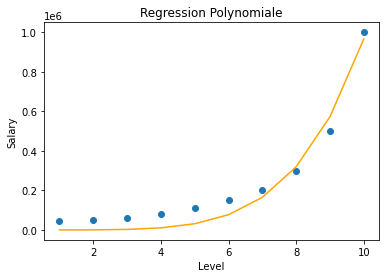

In [46]:
n_iterations = 6000
alpha = 0.0000000001
 
theta_final, cout_historique = gradient_descente(X, y, theta, alpha, n_iterations)
 
print(theta_final) #Voici les parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
 
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.title('Regression Polynomiale')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(x, y)
plt.plot(x, predictions, c='orange')
plt.show()

#### Evaluation

In [47]:
def coefficient_determination(y, pred):
    #Formule de la somme des carrées résiduels
    u = ((y - pred)**2).sum()
         
    #Formule de la somme des carrées
    v = ((y - y.mean())**2).sum()
    return 1-u/v

coefficient_determination(y, predictions).round(3)

0.96

#### Historique
Augmentation du nombre d'itération pour obtenir un plateau

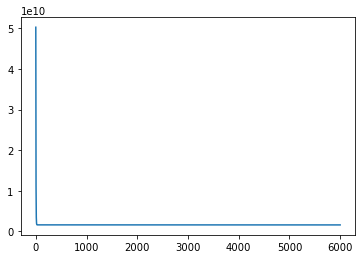

In [48]:
plt.plot(range(n_iterations), cout_historique)
plt.show()

### Avec SKLEARN

#### Lecture du Fichier, et vérification des dimensions des variables

In [49]:
data3 = pd.read_csv("position_salaries.csv")

x = data3["Level"]
y = data3["Salary"]

x = x.values.reshape((x.shape[0],1))
y = y.values.reshape((y.shape[0],1))

print(x.shape)
print(y.shape)

(10, 1)
(10, 1)


#### Recherche du modèle

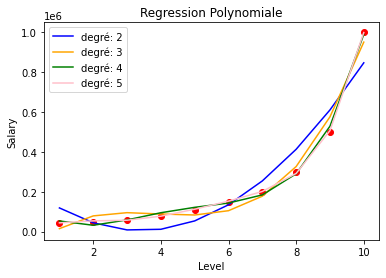

In [50]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

colors=['blue','orange','green','pink','black']
plt.scatter(x, y, color = 'red')

for i in range(2,6):

    model_poly = PolynomialFeatures(degree = i)
    x_poly = model_poly.fit_transform(x)
    model_poly.fit(x_poly,y)
    model = linear_model.LinearRegression()
    model.fit(x_poly, y)

    plt.plot(x, model.predict(model_poly.fit_transform(x)), color = colors[i-2],label='degré: %s' %i)

plt.title('Regression Polynomiale')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend() 

In [51]:
model.score(x_poly, y)

0.9997969027099755

### qualite_vin_rouge

### Sans SKLEARN

In [52]:
data4 = pd.read_csv("qualite-vin-rouge.csv", delimiter=',', sep='\t', encoding="utf-8-sig")
data4

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [53]:
data4.columns

Index(['acidité fixe', 'acidité volatile', 'acide citrique', 'sucre résiduel',
       'chlorures', 'dioxyde de soufre libre', 'anhydride sulfureux total',
       'densité', 'pH', 'sulphates', 'alcool', 'qualité'],
      dtype='object')

In [54]:
data4.columns = data4.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
data4.columns

Index(['acidité_fixe', 'acidité_volatile', 'acide_citrique', 'sucre_résiduel',
       'chlorures', 'dioxyde_de_soufre_libre', 'anhydride_sulfureux_total',
       'densité', 'ph', 'sulphates', 'alcool', 'qualité'],
      dtype='object')

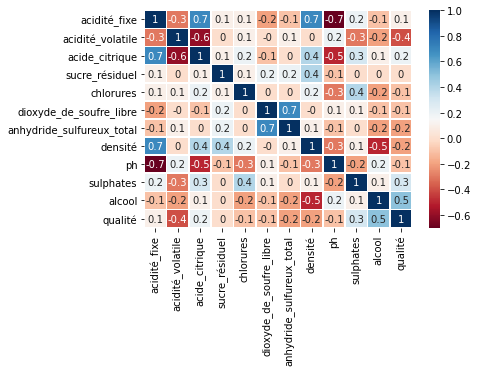

In [55]:
import seaborn as sb

corr = data4.corr().round(1)

sb.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu',
            annot=True,
            linewidth=0.7)

Pour la target y, nous allons choisir les 3 Features ayant une corrélation supérieure ou égale à 0.3, ou inférieure ou égale à -0.3.

In [56]:
x = data4[['acidité_volatile', 'sulphates', 'alcool']]
y = data4['qualité']

y = y.values.reshape((y.shape[0],1))

print(x.shape)
print(y.shape)

(1599, 3)
(1599, 1)


Retourne les valeurs des colonnes **acidité volatile, sulphate et alcool.**

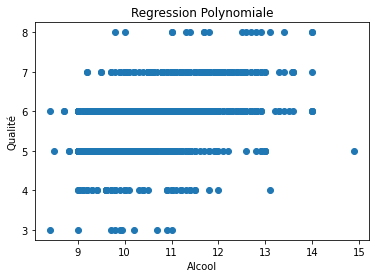

In [57]:
plt.title('Regression Polynomiale')
plt.xlabel('Alcool')
plt.ylabel('Qualité')
plt.scatter(x['alcool'], y)
plt.show()

In [58]:
#Ajout de la colonne de biais a X
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)

#Création d'un vecteur paramètre theta
theta = np.random.randn(4, 1)
theta

(1599, 4)


array([[-0.45265269],
       [ 0.81651259],
       [-0.44804221],
       [-0.1890804 ]])

In [59]:
def model(X, theta):
    return X.dot(theta)
 
def cout_fonction(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
 
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
 
def gradient_descente(X, y, theta, alpha, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cout_historique = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        theta = theta - alpha * gradient(X, y, theta) 
        cout_historique[i] = cout_fonction(X, y, theta)
         
    return theta, cout_historique

In [60]:
n_iterations = 1000
alpha = 0.017
 
theta_final, cout_historique = gradient_descente(X, y, theta, alpha, n_iterations)
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

In [61]:
def coefficient_determination(y, pred):
    #Formule de la somme des carrées résiduels
    u = ((y - pred)**2).sum()
         
    #Formule de la somme des carrées
    v = ((y - y.mean())**2).sum()
    return 1-u/v

coefficient_determination(y, predictions).round(3)

0.271

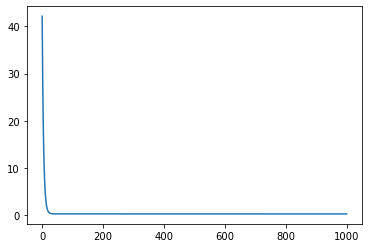

In [62]:
plt.plot(range(n_iterations), cout_historique)
plt.show()

### Avec SKLEARN

In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

data4 = pd.read_csv("qualite-vin-rouge.csv", delimiter=',', sep='\t', encoding="utf-8-sig")
data4.columns = data4.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

x = data4[['acidité_volatile', 'sulphates', 'alcool']]

y = data4['qualité']

y = y.values.reshape((y.shape[0],1))
y.shape

(1599, 1)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x).round(2)
y = scaler.fit_transform(y).round(2)

In [65]:
#Apprentissage
x_app, x_test, y_app, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

#Construction du modèle sur l’échantillon d’apprentissage
model = linear_model.LinearRegression()
model.fit(x_app, y_app)
print(model.coef_)
print(model.intercept_)

#Prédiction sur l’échantillon test
y_pred = model.predict(x_test)

[[-0.28790768  0.11992699  0.3899792 ]]
[-0.01640774]


In [66]:
#Evaluation
model.score(x, y)

0.3346388930783122

In [67]:
mean_squared_error(y_test, y_pred)

0.7025020129674605